In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests

In [2]:
url='https://www.indiatoday.in/india'

In [4]:
webpage=requests.get(url)

In [5]:
webpage

<Response [200]>

In [7]:
soup=BeautifulSoup(webpage.content, 'lxml')

<!DOCTYPE html>
<!--[if IEMobile 7]><html class="iem7" lang="en" dir="ltr"><![endif]-->
<!--[if lte IE 6]><html class="lt-ie9 lt-ie8 lt-ie7" lang="en" dir="ltr"><![endif]-->
<!--[if (IE 7)&(!IEMobile)]><html class="lt-ie9 lt-ie8" lang="en" dir="ltr"><![endif]-->
<!--[if IE 8]><html class="lt-ie9" lang="en" dir="ltr"><![endif]-->
<!--[if (gte IE 9)|(gt IEMobile 7)]><!-->
<html dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <title>
   India News - Latest News, Breaking News and Headlines from India
  </title>
  <meta content="width=device-width, minimum-scale=1, initial-scale=1.0, maximum-scale=5.0" name="viewport"/>
  <!--[if IE]
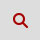
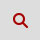
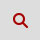
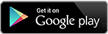
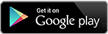
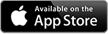
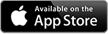
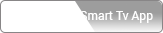
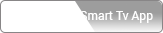

In [9]:
print(soup.prettify())

In [32]:
list=soup.find_all('div',class_="catagory-listing")

In [33]:
len(list)

12

In [47]:
headline=[]
content=[]

for i in list:
    headline.append(i.find('h2').text.strip())
    content.append(i.find('p').text.strip())
    

In [48]:
len(headline)

12

In [49]:
content

["Prime Minister Narendra Modi on Friday said that 'Urban Naxals' had stalled\nthe Sardar Sarovar Dam work in Gujarat's Narmada for years with dubious\nclaims.",
 'External Affairs Minister S Jaishankar on Friday said that Indian politics\nand the Indian cricket team are inclusive examples that democracy has\ndeepened in the country.',
 '',
 "World's first Arctic wolf has been successfully cloned by China. Ten months\nago, China lost its 16-year-old Arctic wolf named Maya. A new Maya has now\nbeen cloned using a beagle dog as the gestational carrier. The clones wolf\nwill stay with dog. Here's a look at whether cloning is a safe practice or\nnot.",
 'A day after a petrol bomb was hurled at the BJP office in Coimbatore, the\nvehicles of BJP officials and the Hindu Munnani in charge in Tamil Nadu’s\nPollachi were damaged with an axe.',
 'TMC MP Mahua Moitra took a dig at the BJP for its poll expenses and said,\n"Ram Rajya is clearly an expensive affair."',
 'Hours after miscreants hurled

In [52]:
d={'headline':headline, 'content':content}

In [53]:
df=pd.DataFrame(d)

In [63]:
df

,headline,content
0,Urban Naxals stalled Sardar Sarovar Dam work f...,Prime Minister Narendra Modi on Friday said th...
1,"Politics, cricket examples that democracy deep...",External Affairs Minister S Jaishankar on Frid...
2,"Traffic snarls, waterlogged roads, life thrown...",
3,World's First Arctic Wolf Is Here,World's first Arctic wolf has been successfull...
4,Windows of cars owned by BJP officials broken ...,A day after a petrol bomb was hurled at the BJ...
5,Ram Rajya an expensive affair: TMC's Mahua Moi...,TMC MP Mahua Moitra took a dig at the BJP for ...
6,Won’t deter us: BJP’s Annamalai after miscrean...,Hours after miscreants hurled a petrol bomb ne...
7,"Process to ban PFI has begun, says K'taka mini...",Karnataka Home Minister Araga Jnanendra has st...
8,"'UP govt has no answers on inflation, jobs': A...",Akhilesh Yadav walked out of the UP Assembly o...
9,District Magistrate’s office waterlogged in Gr...,The Gautam Budh Nagar District Magistrate’s of...


In [69]:
final=pd.DataFrame()
for j in range(1,9):
    url='https://www.indiatoday.in/india'.format(j)
    webpage=requests.get(url)
    soup=BeautifulSoup(webpage.content, 'lxml')
    list=soup.find_all('div',class_="catagory-listing")
    headline=[]
    content=[]

    for i in list:
        headline.append(i.find('h2').text.strip())
        content.append(i.find('p').text.strip())
        
    d={'headline':headline, 'content':content}
    df=pd.DataFrame(d)
    final=final.append(df)

In [71]:
final

,headline,content
0,UP Assembly makes history with day reserved fo...,The Uttar Pradesh Assembly made history by res...
1,"'Dynasty, Money, Katta': JP Nadda 'defines' DM...",BJP chief JP Nadda made a scathing attack on t...
2,Miscreants hurl petrol bombs at plywood store ...,Unidentified miscreants hurled petrol bombs in...
3,"Nitish betrayed Bihar to sit on Lalu's lap, ca...",Union Home Minister Amit Shah on Friday launch...
4,Youth who stabbed man in Shivamogga over Savar...,Karnataka Police has said the youth who stabbe...
...,...,...
7,"Lalu-Nitish duo will be wiped out in 2024, say...","Home Minister Amit Shah, while addressing a ra..."
8,Petrol bomb hurled at RSS office in Kerala’s K...,A petrol bomb was hurled at the office of the ...
9,Petrol bomb hurled at RSS office in Kerala’s K...,Two unidentified men on a bike hurled a petrol...
10,'Urban Naxals' stalled Sardar Sarovar Dam work...,Prime Minister Narendra Modi on Friday said th...


In [72]:
final.shape

(96, 2)

In [73]:
final.insert(loc=2,column="Date", value='23sept2022')

In [74]:
final

,headline,content,Date
0,UP Assembly makes history with day reserved fo...,The Uttar Pradesh Assembly made history by res...,23sept2022
1,"'Dynasty, Money, Katta': JP Nadda 'defines' DM...",BJP chief JP Nadda made a scathing attack on t...,23sept2022
2,Miscreants hurl petrol bombs at plywood store ...,Unidentified miscreants hurled petrol bombs in...,23sept2022
3,"Nitish betrayed Bihar to sit on Lalu's lap, ca...",Union Home Minister Amit Shah on Friday launch...,23sept2022
4,Youth who stabbed man in Shivamogga over Savar...,Karnataka Police has said the youth who stabbe...,23sept2022
...,...,...,...
7,"Lalu-Nitish duo will be wiped out in 2024, say...","Home Minister Amit Shah, while addressing a ra...",23sept2022
8,Petrol bomb hurled at RSS office in Kerala’s K...,A petrol bomb was hurled at the office of the ...,23sept2022
9,Petrol bomb hurled at RSS office in Kerala’s K...,Two unidentified men on a bike hurled a petrol...,23sept2022
10,'Urban Naxals' stalled Sardar Sarovar Dam work...,Prime Minister Narendra Modi on Friday said th...,23sept2022


In [75]:
final.insert(loc=3,column="Author", value='India Today')

In [76]:
final

,headline,content,Date,Author
0,UP Assembly makes history with day reserved fo...,The Uttar Pradesh Assembly made history by res...,23sept2022,India Today
1,"'Dynasty, Money, Katta': JP Nadda 'defines' DM...",BJP chief JP Nadda made a scathing attack on t...,23sept2022,India Today
2,Miscreants hurl petrol bombs at plywood store ...,Unidentified miscreants hurled petrol bombs in...,23sept2022,India Today
3,"Nitish betrayed Bihar to sit on Lalu's lap, ca...",Union Home Minister Amit Shah on Friday launch...,23sept2022,India Today
4,Youth who stabbed man in Shivamogga over Savar...,Karnataka Police has said the youth who stabbe...,23sept2022,India Today
...,...,...,...,...
7,"Lalu-Nitish duo will be wiped out in 2024, say...","Home Minister Amit Shah, while addressing a ra...",23sept2022,India Today
8,Petrol bomb hurled at RSS office in Kerala’s K...,A petrol bomb was hurled at the office of the ...,23sept2022,India Today
9,Petrol bomb hurled at RSS office in Kerala’s K...,Two unidentified men on a bike hurled a petrol...,23sept2022,India Today
10,'Urban Naxals' stalled Sardar Sarovar Dam work...,Prime Minister Narendra Modi on Friday said th...,23sept2022,India Today


In [77]:
final.shape

(96, 4)

In [78]:
final.to_csv('IndiaToday_Pageno_1_to_9')

In [79]:
pd.read_csv('IndiaToday_Pageno_1_to_9')

,Unnamed: 0,headline,content,Date,Author
0,0,UP Assembly makes history with day reserved fo...,The Uttar Pradesh Assembly made history by res...,23sept2022,India Today
1,1,"'Dynasty, Money, Katta': JP Nadda 'defines' DM...",BJP chief JP Nadda made a scathing attack on t...,23sept2022,India Today
2,2,Miscreants hurl petrol bombs at plywood store ...,Unidentified miscreants hurled petrol bombs in...,23sept2022,India Today
3,3,"Nitish betrayed Bihar to sit on Lalu's lap, ca...",Union Home Minister Amit Shah on Friday launch...,23sept2022,India Today
4,4,Youth who stabbed man in Shivamogga over Savar...,Karnataka Police has said the youth who stabbe...,23sept2022,India Today
...,...,...,...,...,...
91,7,"Lalu-Nitish duo will be wiped out in 2024, say...","Home Minister Amit Shah, while addressing a ra...",23sept2022,India Today
92,8,Petrol bomb hurled at RSS office in Kerala’s K...,A petrol bomb was hurled at the office of the ...,23sept2022,India Today
93,9,Petrol bomb hurled at RSS office in Kerala’s K...,Two unidentified men on a bike hurled a petrol...,23sept2022,India Today
94,10,'Urban Naxals' stalled Sardar Sarovar Dam work...,Prime Minister Narendra Modi on Friday said th...,23sept2022,India Today


In [80]:
final.head()

,headline,content,Date,Author
0,UP Assembly makes history with day reserved fo...,The Uttar Pradesh Assembly made history by res...,23sept2022,India Today
1,"'Dynasty, Money, Katta': JP Nadda 'defines' DM...",BJP chief JP Nadda made a scathing attack on t...,23sept2022,India Today
2,Miscreants hurl petrol bombs at plywood store ...,Unidentified miscreants hurled petrol bombs in...,23sept2022,India Today
3,"Nitish betrayed Bihar to sit on Lalu's lap, ca...",Union Home Minister Amit Shah on Friday launch...,23sept2022,India Today
4,Youth who stabbed man in Shivamogga over Savar...,Karnataka Police has said the youth who stabbe...,23sept2022,India Today


In [81]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 11
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  96 non-null     object
 1   content   96 non-null     object
 2   Date      96 non-null     object
 3   Author    96 non-null     object
dtypes: object(4)
memory usage: 3.8+ KB


In [83]:
final.isna().sum()

headline    0
content     0
Date        0
Author      0
dtype: int64